# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import Data 

In [2]:
data_car_audi = pd.read_csv('I:\Python\dataSet\ml\cars\\audi.csv')

# AUDI

In [3]:
data_car_audi.head()
# mpg : used to show how far your car can travel for every gallon.
# mileage : how many miles the vehicle has covered in its life time.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# Data Preprocessing

## Information about Data

In [4]:
data_car_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


## Clean Data

In [5]:
# check if there is null values
data_car_audi.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Duplicated Data

In [6]:
# number of duplicated data
data_car_audi.duplicated().sum()

103

In [7]:
# drop duplicated data
data_car_audi.drop_duplicates(inplace=True)

# Exploratory Data Analysis

* Describe the Data

In [8]:
round(data_car_audi.loc[:, data_car_audi.columns != 'year'].describe(), 1)

,price,mileage,tax,mpg,engineSize
count,10565.0,10565.0,10565.0,10565.0,10565.0
mean,22854.0,24956.0,125.9,50.8,1.9
std,11723.1,23448.9,67.4,13.0,0.6
min,1490.0,1.0,0.0,18.9,0.0
25%,15000.0,6000.0,125.0,40.9,1.5
50%,20000.0,19268.0,145.0,49.6,2.0
75%,27990.0,36668.0,145.0,58.9,2.0
max,145000.0,323000.0,580.0,188.3,6.3


* Type of models

In [9]:
data_car_audi['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

* Number of each model

In [10]:
data_car_audi['model'].value_counts()

 A3     1917
 Q3     1379
 A4     1375
 A1     1337
 A5      874
 Q5      864
 Q2      810
 A6      748
 Q7      394
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      28
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

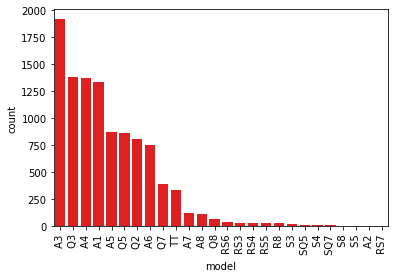

In [11]:
sns.countplot(x='model', data= data_car_audi, order=data_car_audi['model'].value_counts().index, color='red')
plt.xticks(rotation=90)
plt.show()

* Type of transmission

In [12]:
data_car_audi['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

* Number of each transmission

In [13]:
data_car_audi['transmission'].value_counts()

Manual       4317
Semi-Auto    3568
Automatic    2680
Name: transmission, dtype: int64

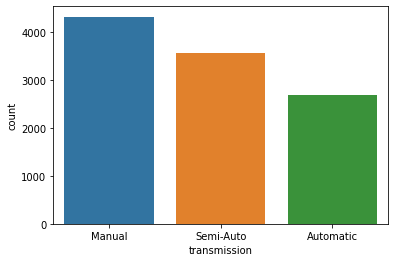

In [14]:
sns.countplot(x='transmission', data = data_car_audi, order= data_car_audi['transmission'].value_counts().index)
plt.show()

* Type of fuel

In [15]:
data_car_audi['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

* Number of each fuel

In [16]:
data_car_audi['fuelType'].value_counts()

Diesel    5537
Petrol    5000
Hybrid      28
Name: fuelType, dtype: int64

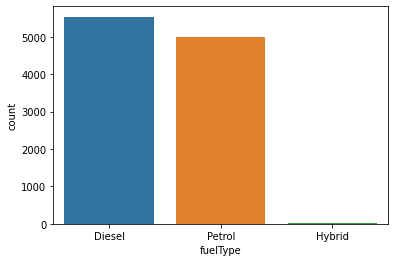

In [17]:
sns.countplot(x='fuelType', data = data_car_audi, order= data_car_audi['fuelType'].value_counts().index)
plt.show()

* The most year has model

In [18]:
data_car_audi['year'].value_counts()

2019    3139
2016    1959
2017    1932
2015     995
2018     860
2020     689
2014     446
2013     290
2012      85
2011      47
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       6
2004       5
2002       2
1998       1
1997       1
Name: year, dtype: int64

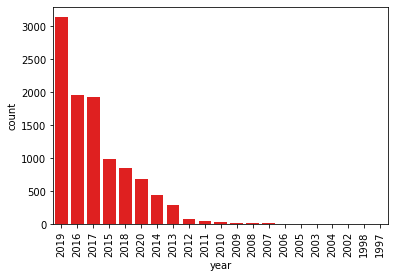

In [19]:
sns.countplot(x='year', data = data_car_audi, order= data_car_audi['year'].value_counts().index,color='red')
plt.xticks(rotation=90)
plt.show()

* The Correlation between Columns

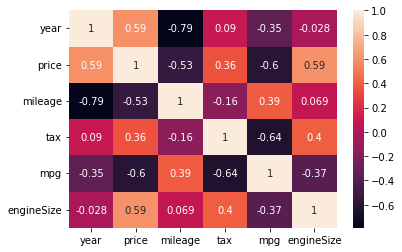

In [20]:
sns.heatmap(data_car_audi.corr(), annot=True)
plt.show()

* The most year has largest price 

In [21]:
data_car_audi_price_year = data_car_audi.groupby('year')['price'].sum().reset_index().sort_values('price', ascending=False)

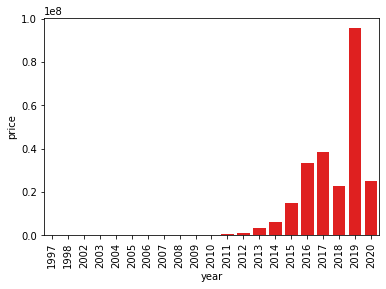

In [22]:
sns.barplot(x='year', y='price', data = data_car_audi_price_year, color='red')
plt.xticks(rotation=90)
plt.show()

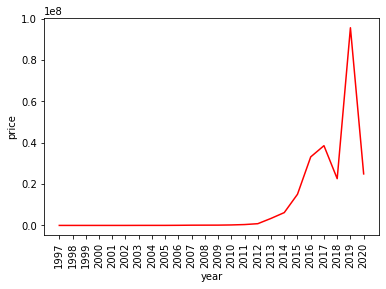

In [23]:
sns.lineplot(x='year', y='price', data = data_car_audi_price_year,  color='red')
plt.xticks(np.arange(1997, 2021),rotation=90)
plt.show()

* We need yo know: Why did total price in 2019 increase and in 2020 decrease?!

## Data in 2019

In [24]:
data_car_audi_2019 = data_car_audi[data_car_audi['year'] == 2019]

* The Correlation between Columns

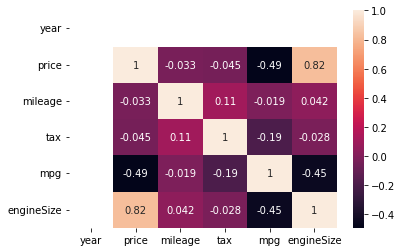

In [25]:
sns.heatmap(data_car_audi_2019.corr(), annot=True)
plt.show()

* Number of each model in 2019

In [26]:
data_car_audi_count_model_2019 = pd.DataFrame(data_car_audi_2019['model'].value_counts())

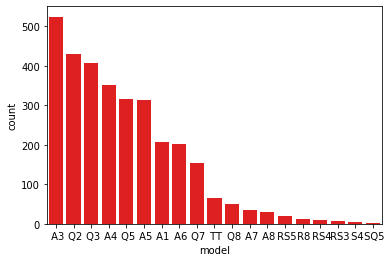

In [27]:
sns.countplot(x='model', data= data_car_audi_2019, color='red', order=data_car_audi_count_model_2019.index)
plt.show()

* Group data 2019 by model and total price for each model

In [28]:
data_car_audi_price_model_2019 = pd.DataFrame(data_car_audi_2019.groupby('model')['price'].sum().sort_values(ascending=False))

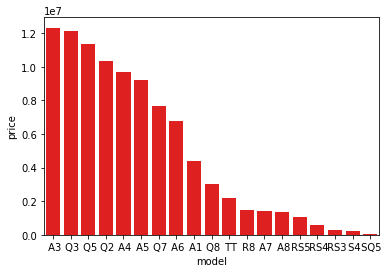

In [29]:
sns.barplot(x=data_car_audi_price_model_2019.index, y='price',data= data_car_audi_price_model_2019 ,color='red')
plt.show()

* Correlation between engine size and price of model with type of transmission

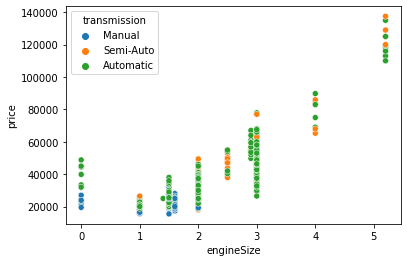

In [30]:
sns.scatterplot(x='engineSize', y='price', data=data_car_audi_2019, hue='transmission')
plt.show()

* Correlation between engine size and price of model with type of fuel

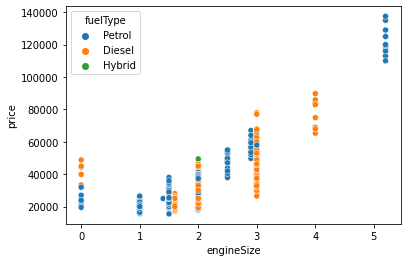

In [31]:
sns.scatterplot(x='engineSize', y='price', data=data_car_audi_2019, hue='fuelType')
plt.show()

## Data in 2020

In [32]:
data_car_audi_2020 = data_car_audi[data_car_audi['year'] == 2020]

* The Correlation between Columns

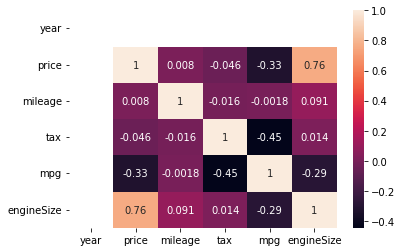

In [33]:
sns.heatmap(data_car_audi_2020.corr(), annot=True)
plt.show()

* number of each model in 2020

In [34]:
data_car_audi_count_model_2020 = pd.DataFrame(data_car_audi_2020['model'].value_counts())

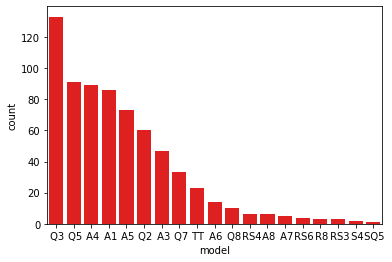

In [35]:
sns.countplot(x='model', data= data_car_audi_2020, color='red', order=data_car_audi_count_model_2020.index)
plt.show()

* Group data 2020 by model and price for each model

In [36]:
data_car_audi_price_model_2020 = pd.DataFrame(data_car_audi_2020.groupby('model')['price'].sum().sort_values(ascending=False))

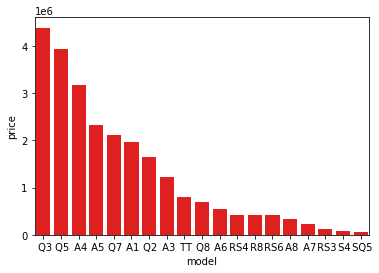

In [37]:
sns.barplot(x=data_car_audi_price_model_2020.index, y='price',data= data_car_audi_price_model_2020 ,color='red')
plt.show()

* Correlation between engine size and price of model with type of transmission

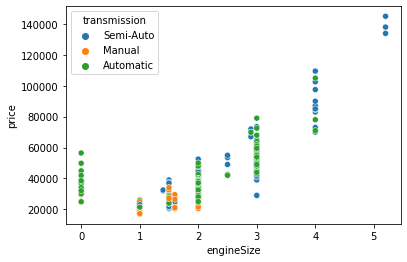

In [38]:
sns.scatterplot(x='engineSize', y='price', data=data_car_audi_2020, hue='transmission')
plt.show()

* Correlation between engine size and price of model with type of fuel

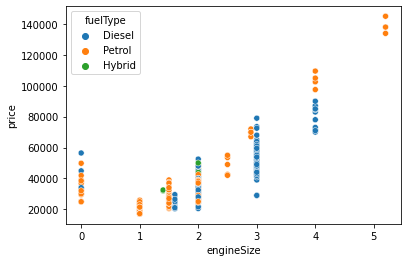

In [39]:
sns.scatterplot(x='engineSize', y='price', data=data_car_audi_2020, hue='fuelType')
plt.show()

* Total price in 2020 decreased because the number of the A3 model was less than in 2019.

In [42]:
data_car_audi.to_csv('I:\Python\dataSet\ml\cars\\audi_data_clean.csv')